# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 6: Portfolio Optimization with Custom Parameters

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
# pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2022-02-18'

# Tickers of assets
assets =  ['VT', 'SPY', 'SHY', 'LQDE.L', 'IYR', 'DBX', 'PSP', 'DBEF']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  8 of 8 completed


In [2]:
data.head()

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
Date,,,,,,,,
2016-01-04,22.635590,NaN,60.971714,109.690002,6.969952,78.942329,180.112762,49.557636
2016-01-05,22.669376,NaN,61.972210,109.680000,6.916387,78.895607,180.417419,49.566387
2016-01-06,22.255518,NaN,61.767166,109.860001,6.829347,78.942329,178.141556,48.831558
2016-01-07,21.647398,NaN,60.389462,109.839996,6.635178,78.970360,173.867737,47.694302
2016-01-08,21.402456,NaN,59.675999,110.260002,6.541444,79.026443,171.959244,47.134441


In [3]:
prices = data.dropna()
prices.head()

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
Date,,,,,,,,
2018-03-23,26.548468,28.480000,65.343536,111.089996,9.461545,79.527939,241.732239,66.289391
2018-03-26,26.996319,30.450001,66.168159,111.199997,9.628093,79.489815,248.345764,67.850861
2018-03-27,26.853006,29.900000,66.347420,111.470001,9.509130,79.546959,244.121017,66.949135
2018-03-28,27.282942,30.980000,67.629196,112.010002,9.509130,79.556519,243.399673,66.921524
2018-03-29,27.506865,31.250000,67.647125,112.349998,9.548784,79.585106,246.509750,67.749641


In [4]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
Date,,,,,,,,
2018-03-26,0.016869,0.069171,0.012620,0.000990,0.017603,-0.000479,0.027359,0.023555
2018-03-27,-0.005309,-0.018062,0.002709,0.002428,-0.012356,0.000719,-0.017012,-0.013290
2018-03-28,0.016011,0.036120,0.019319,0.004844,0.000000,0.000120,-0.002955,-0.000412
2018-03-29,0.008207,0.008715,0.000265,0.003035,0.004170,0.000359,0.012778,0.012374
2018-04-02,-0.014653,-0.039680,-0.013780,0.000000,-0.010797,0.000287,-0.021585,-0.019829


In [5]:
Y.dtypes

DBEF      float64
DBX       float64
IYR       float64
LQDE.L    float64
PSP       float64
SHY       float64
SPY       float64
VT        float64
dtype: object

In [6]:
Y.tail()

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
Date,,,,,,,,
2022-02-11,-0.013514,-0.020668,-0.010373,-0.004376,-0.022776,0.003088,-0.019719,-0.017345
2022-02-14,-0.003688,-0.010146,-0.009317,-0.000930,-0.008740,-0.002131,-0.003269,-0.005029
2022-02-15,0.014543,0.024600,0.007641,-0.000085,0.023512,0.000356,0.016127,0.017542
2022-02-16,0.001043,-0.003601,0.003305,-0.005330,-0.002871,0.001305,0.001121,0.003019
2022-02-17,-0.014840,-0.053012,-0.011240,0.000000,-0.033117,0.000592,-0.021361,-0.019324


In [7]:
Y.index.dtype

dtype('<M8[ns]')

In [8]:
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import EfficientFrontier
import riskfolio as rp

In [9]:
sample_cov = risk_models.sample_cov(Y, frequency=252)
sample_cov

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
DBEF,5873.402854,-81.364857,-299.081220,282.741303,357.955736,143.293541,1366.157514,-346.678675
DBX,-81.364857,18569.524305,649.316700,1756.889505,-881.745605,218.998467,-211.526553,-303.975402
IYR,-299.081220,649.316700,64866.264269,-914.978002,-68.726387,-276.677661,2148.004109,-790.196649
LQDE.L,282.741303,1756.889505,-914.978002,12275.939660,-68.582475,-3435.505840,-23.794408,-301.174264
PSP,357.955736,-881.745605,-68.726387,-68.582475,3193.166722,151.881241,-497.562245,771.545397
SHY,143.293541,218.998467,-276.677661,-3435.505840,151.881241,496913.518302,156.184013,112.462684
SPY,1366.157514,-211.526553,2148.004109,-23.794408,-497.562245,156.184013,40016.516704,-1634.127006
VT,-346.678675,-303.975402,-790.196649,-301.174264,771.545397,112.462684,-1634.127006,19758.748179


<AxesSubplot:>

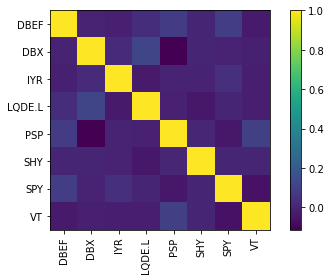

In [10]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

In [11]:
port = rp.Portfolio(returns=Y)

In [12]:
Y

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
Date,,,,,,,,
2018-03-26,0.016869,0.069171,0.012620,0.000990,0.017603,-0.000479,0.027359,0.023555
2018-03-27,-0.005309,-0.018062,0.002709,0.002428,-0.012356,0.000719,-0.017012,-0.013290
2018-03-28,0.016011,0.036120,0.019319,0.004844,0.000000,0.000120,-0.002955,-0.000412
2018-03-29,0.008207,0.008715,0.000265,0.003035,0.004170,0.000359,0.012778,0.012374
2018-04-02,-0.014653,-0.039680,-0.013780,0.000000,-0.010797,0.000287,-0.021585,-0.019829
...,...,...,...,...,...,...,...,...
2022-02-11,-0.013514,-0.020668,-0.010373,-0.004376,-0.022776,0.003088,-0.019719,-0.017345
2022-02-14,-0.003688,-0.010146,-0.009317,-0.000930,-0.008740,-0.002131,-0.003269,-0.005029
2022-02-15,0.014543,0.024600,0.007641,-0.000085,0.023512,0.000356,0.016127,0.017542


In [13]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(Y, returns_data=True)
mu

DBEF      0.084110
DBX       0.135277
IYR       0.095145
LQDE.L    0.038939
PSP       0.099806
SHY       0.019145
SPY       0.094736
VT        0.093214
Name: mkt, dtype: float64

In [14]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, 0.4))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('DBEF', 0.19407),
             ('DBX', 0.00593),
             ('IYR', 0.0),
             ('LQDE.L', 0.4),
             ('PSP', 0.0),
             ('SHY', 0.4),
             ('SPY', 0.0),
             ('VT', 0.0)])

In [15]:
weights_df = pd.DataFrame(weights, index=[0])

In [16]:
# Load our custom estimates of input parameters
custom_mu = weights_df.T
custom_cov = sample_cov

In [17]:
custom_mu = custom_mu.rename(columns={0:"Weights"})
custom_mu = custom_mu.T

In [18]:
# Input manually the custom parameters:
port.mu = custom_mu / 100 # Custom mean vector.
port.cov = custom_cov / 100 # Custom covariance matrix.

In [19]:
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

In [21]:
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=True)

display(w.T)

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
weights,0.474216,0.000538,0.009254,0.48407,0.000111,0.015309,0.000477,0.016025


## 2. Estimating Mean Variance Portfolios with Custom Parameters

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

### 2.2 Plotting portfolio composition

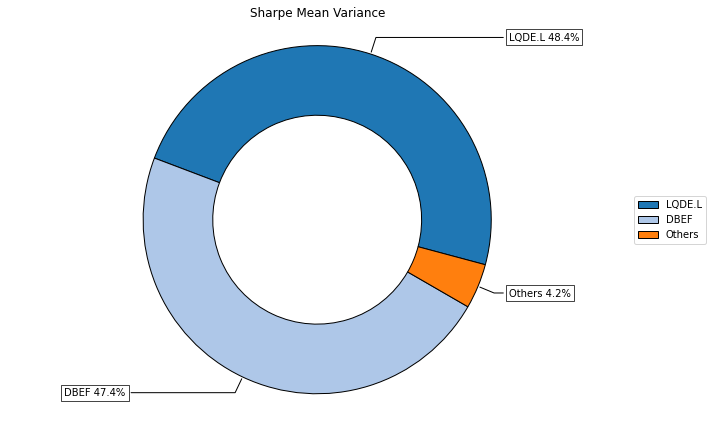

In [22]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [23]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
0,0.214761,0.091819,0.024309,0.108448,0.452865,0.003450,0.036944,0.067405
1,0.291647,0.058757,0.021303,0.212713,0.329299,0.006714,0.023685,0.055881
2,0.325454,0.044219,0.019981,0.258561,0.274965,0.008151,0.017855,0.050814
3,0.352691,0.032506,0.018917,0.295500,0.231190,0.009308,0.013158,0.046731
4,0.376708,0.022177,0.017977,0.328071,0.192590,0.010328,0.009016,0.043131


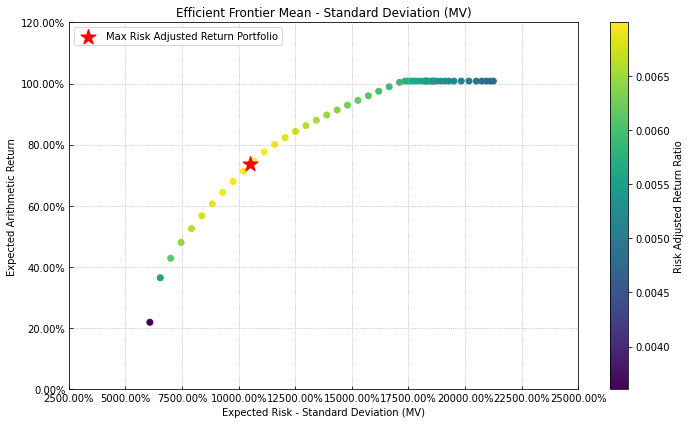

In [24]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, t_factor=252, ax=None)

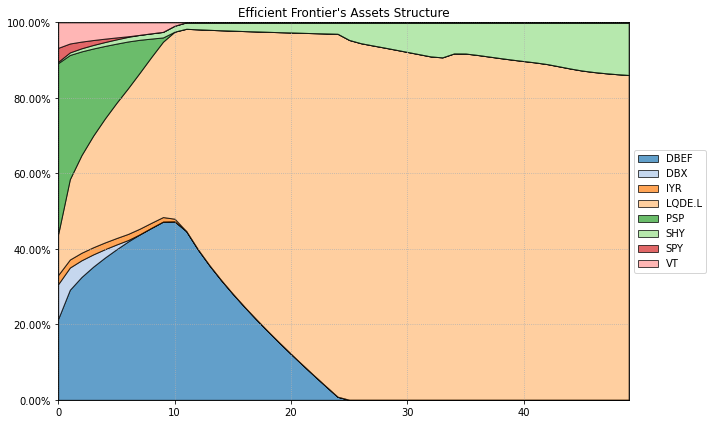

In [25]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios with Custom Mean Parameter

In this part I will calculate optimal portfolios for several risk measures using a custom mean parameter as input. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [26]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
weights,0.008159,1.143450e-12,2.526940e-14,5.097119e-14,2.845862e-14,0.991841,8.632803e-14,7.357609e-14


### 3.2 Plotting portfolio composition

ZeroDivisionError: integer division or modulo by zero

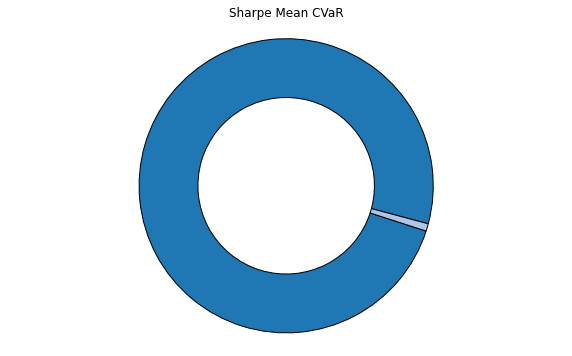

In [27]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [28]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,DBEF,DBX,IYR,LQDE.L,PSP,SHY,SPY,VT
0,1.362449e-02,1.173731e-03,2.409822e-13,4.313392e-13,2.677061e-13,0.985202,1.012835e-12,8.095519e-13
1,8.819442e-15,3.218143e-15,3.309762e-15,6.550844e-05,3.343476e-15,0.999934,3.313340e-15,3.325352e-15
2,3.578719e-14,1.334912e-14,1.378851e-14,2.230114e-04,1.415139e-14,0.999777,1.393598e-14,1.401065e-14
3,1.606671e-15,8.408346e-16,8.789523e-16,2.161532e-04,9.005701e-16,0.999784,8.829321e-16,8.912487e-16
4,1.432256e-15,6.323996e-16,6.603257e-16,4.878443e-04,6.857990e-16,0.999512,6.629127e-16,6.709871e-16


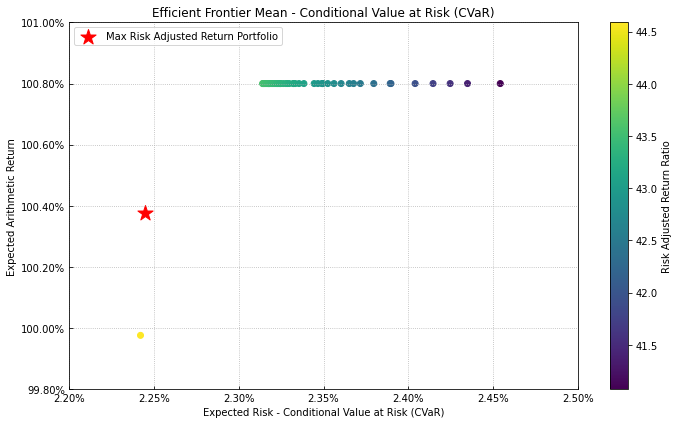

In [29]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, t_factor=252, ax=None)

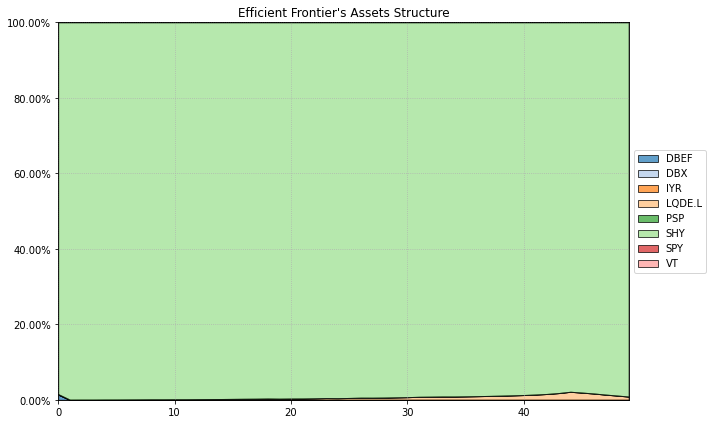

In [30]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [31]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [32]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
DBEF,47.42%,0.00%,1.07%,1.86%,1.60%,0.82%,1.18%,0.00%,4.78%,3.35%,1.27%,2.11%,3.89%
DBX,0.05%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IYR,0.93%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LQDE.L,48.41%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PSP,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SHY,1.53%,86.35%,96.82%,98.14%,98.40%,99.18%,98.82%,100.00%,94.85%,96.22%,96.65%,96.67%,95.81%
SPY,0.05%,13.65%,2.11%,0.00%,0.00%,0.00%,0.00%,0.00%,0.37%,0.43%,2.09%,1.22%,0.30%
VT,1.60%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

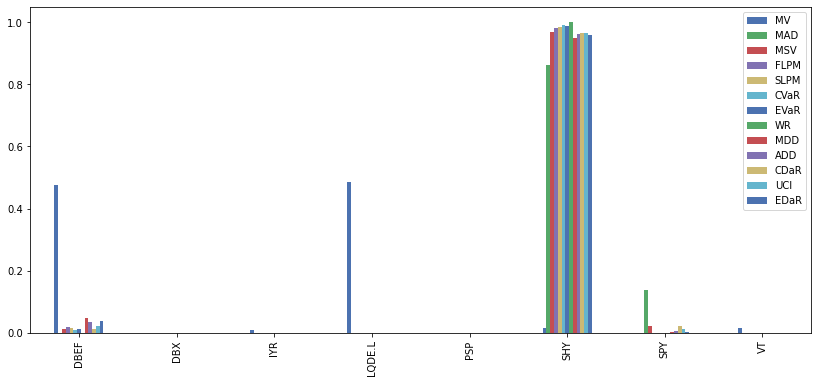

In [33]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)